In [1]:
import pandas as pd
import numpy as np

In [2]:
players = pd.read_csv("players_22.csv")

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
players = players.dropna(subset=features)

In [6]:
data = players[features].copy()

In [7]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [8]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [9]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [10]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()), axis=0)
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [11]:
centroids = random_centroids(data, 5)

In [12]:
centroids

,0,1,2,3,4
overall,5.347826,3.608696,5.130435,7.304348,4.043478
potential,6.869565,5.565217,4.260870,5.130435,4.043478
wage_eur,1.004292,1.128755,1.071531,1.071531,1.071531
value_eur,1.241815,1.257280,1.020156,1.035620,1.024022
age,3.962963,3.222222,3.222222,2.851852,2.481481


In [13]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [14]:
labels = get_labels(data, centroids)

In [15]:
labels.value_counts()

0    10042
1     4515
2     3497
4     1047
3       64
dtype: int64

In [16]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp((np.log(x)).mean())).T
    return centroids

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [18]:
def plot_clusters(data, labels):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    clear_output(wait=True)
    plt.show()

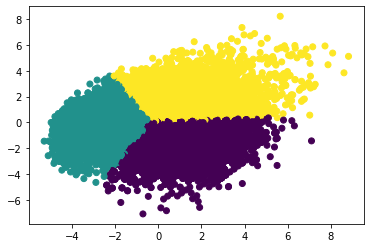

In [28]:
max_iterations = 10000
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    iteration += 1
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels)

In [20]:
centroids

,0,1,2
overall,3.443294,5.200401,6.336567
potential,5.362259,4.894314,7.107863
wage_eur,1.031502,1.130802,1.460086
value_eur,1.029525,1.049844,1.313192
age,2.678624,5.962199,3.877681


In [21]:
labels.value_counts()

1    7192
0    6198
2    5775
dtype: int64

In [22]:
players[labels == 0]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
7025,234018,https://sofifa.com/player/234018/sandeiro-luan...,Sandeiro Leal,Sandeiro Luan Leal Neto,CAM,68,68,1400000.0,7000.0,21,...,54+2,54+2,54+2,56+2,15+2,https://cdn.sofifa.net/players/234/018/22_120.png,https://cdn.sofifa.net/teams/111041/60.png,https://cdn.sofifa.net/flags/br.png,NaN,https://cdn.sofifa.net/flags/br.png
8028,230187,https://sofifa.com/player/230187/narcisso-elia...,Narcisso Mau,Narcisso Elias Mau de Faria,"LB, RB",67,67,1100000.0,4000.0,21,...,64+2,64+2,64+2,65+2,19+2,https://cdn.sofifa.net/players/230/187/22_120.png,https://cdn.sofifa.net/teams/112476/60.png,https://cdn.sofifa.net/flags/br.png,NaN,https://cdn.sofifa.net/flags/br.png
8029,230192,https://sofifa.com/player/230192/joao-rodolfo-...,Botelhinonsa,João Rodolfo Botelho Maia,RB,67,67,1100000.0,4000.0,21,...,67,67,67,65+2,17+2,https://cdn.sofifa.net/players/230/192/22_120.png,https://cdn.sofifa.net/teams/1039/60.png,https://cdn.sofifa.net/flags/br.png,NaN,https://cdn.sofifa.net/flags/br.png
8030,230200,https://sofifa.com/player/230200/edenildo-eloi...,Edenildo Lagoas,Edenildo Eloi Lagoas Regalo,"RB, CB",67,67,1100000.0,3000.0,21,...,66+1,66+1,66+1,65+2,20+2,https://cdn.sofifa.net/players/230/200/22_120.png,https://cdn.sofifa.net/teams/111059/60.png,https://cdn.sofifa.net/flags/br.png,NaN,https://cdn.sofifa.net/flags/br.png
8040,230485,https://sofifa.com/player/230485/dener-adao-ro...,Dener Rolim,Dener Adão Rolim Leal,"CAM, RM",67,67,1200000.0,4000.0,21,...,43+2,43+2,43+2,46+2,18+2,https://cdn.sofifa.net/players/230/485/22_120.png,https://cdn.sofifa.net/teams/1598/60.png,https://cdn.sofifa.net/flags/br.png,NaN,https://cdn.sofifa.net/flags/br.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(3, random_state=0)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=0)

In [25]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,6.788388,3.874743,5.222928
potential,7.230017,5.664890,4.890676
wage_eur,1.718713,1.043762,1.125358
value_eur,1.452709,1.039236,1.044330
age,4.473680,2.899166,6.130374
